In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

2024-04-06 14:55:35.336164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 14:55:35.336310: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 14:55:35.573510: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
import cv2

def show_images_from_folder(folder_path, num_images):
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:num_images]

    # Create subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for idx, img_file in enumerate(image_files):
        # Read image using OpenCV
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)

        # Display the image
        axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[idx].set_title(img_file)
        axes[idx].axis('off')

    plt.show()

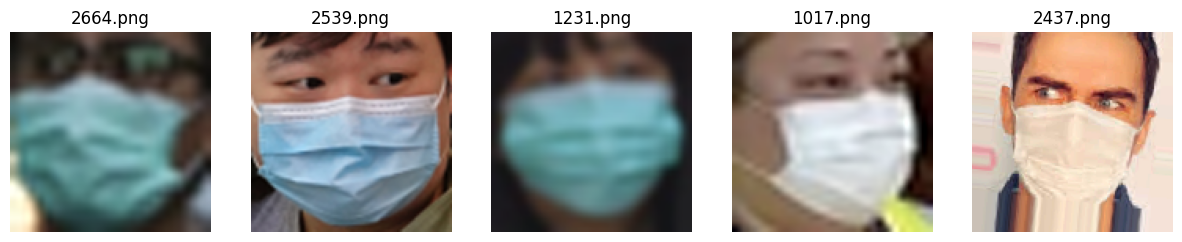

In [10]:
# Path to your image folder
folder_path = '/kaggle/input/face-mask-detection/Dataset/with_mask'
# Number of images to display
num_images_to_display = 5

show_images_from_folder(folder_path, num_images_to_display)

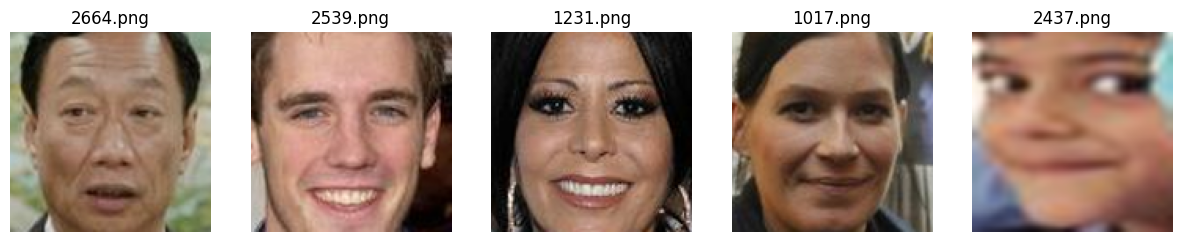

In [12]:
# Path to your image folder
folder_path = '/kaggle/input/face-mask-detection/Dataset/without_mask'
# Number of images to display
num_images_to_display = 5

show_images_from_folder(folder_path, num_images_to_display)

In [13]:
X_train = []
Y_train = []

for i in tqdm(glob('/kaggle/input/face-mask-detection/Dataset/with_mask/*')):
    temp = np.array(Image.open(i).resize((48,48)))
    X_train.append(temp)
    Y_train.append(1)
    
for i in tqdm(glob('/kaggle/input/face-mask-detection/Dataset/without_mask/*')):
    temp = np.array(Image.open(i).resize((48,48)))
    X_train.append(temp)
    Y_train.append(0)       

100%|██████████| 2994/2994 [00:17<00:00, 167.06it/s]


In [14]:
X_train = np.array(X_train)
X_train = X_train/255.0
Y_train = np.array(Y_train)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

# Define the model
model = Sequential(name='DCNN')

model.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 3),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_1'
    )
)
model.add(BatchNormalization(name='batchnorm_1'))
model.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_2'
    )
)
model.add(BatchNormalization(name='batchnorm_2'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
model.add(Dropout(0.4, name='dropout_1'))

model.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_3'
    )
)
model.add(BatchNormalization(name='batchnorm_3'))
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_4'
    )
)
model.add(BatchNormalization(name='batchnorm_4'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
model.add(Dropout(0.4, name='dropout_2'))

model.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_5'
    )
)
model.add(BatchNormalization(name='batchnorm_5'))
model.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        strides=(1,1),
        name='conv2d_6'
    )
)
model.add(BatchNormalization(name='batchnorm_6'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
model.add(Dropout(0.5, name='dropout_3'))

model.add(Flatten(name='flatten'))

model.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
model.add(BatchNormalization(name='batchnorm_7'))

model.add(Dropout(0.6, name='dropout_4'))

model.add(
    Dense(
        1,
        activation='sigmoid',
        name='out_layer'
    )
)

model.summary()

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,398,017 (9.15 MB)

 Trainable params: 2,395,969 (9.14 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=6,
    verbose=1,
    restore_best_weights=True,
)

In [21]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(x_train)

In [31]:
batch_size = 32
epochs = 50

# Train the model
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=int(len(x_train) / batch_size),
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9608 - loss: 0.1188 - val_accuracy: 0.9733 - val_loss: 0.0850
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0888 - val_accuracy: 0.9758 - val_loss: 0.0739
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9613 - loss: 0.1120 - val_accuracy: 0.9482 - val_loss: 0.1314
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.3226 - val_accuracy: 0.9432 - val_loss: 0.1354
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9686 - loss: 0.0957 - val_accuracy: 0.9624 - val_loss: 0.0948
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.9566 - val_loss: 0.1115
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


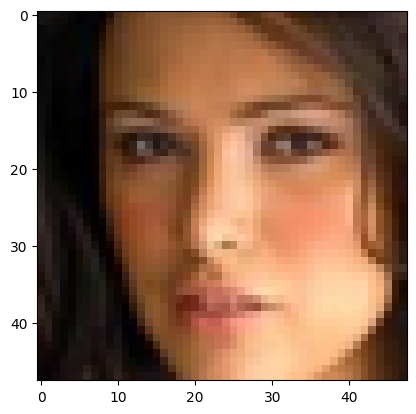

No Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


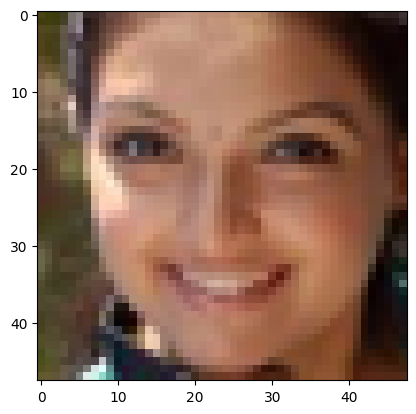

No Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


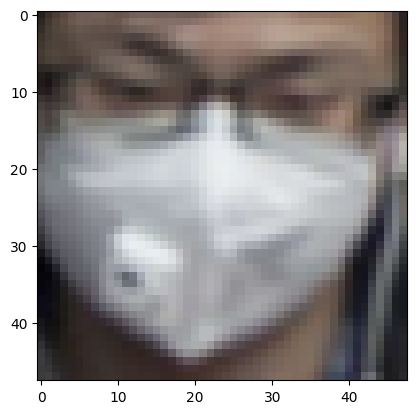

Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


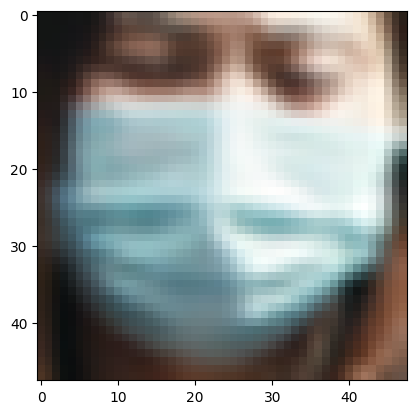

Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


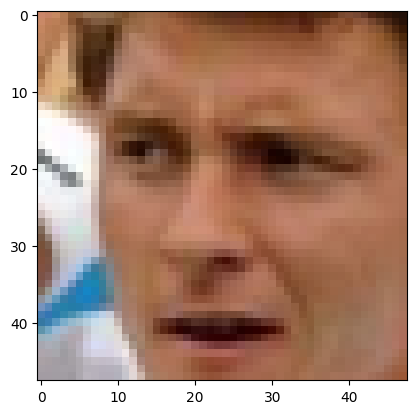

No Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


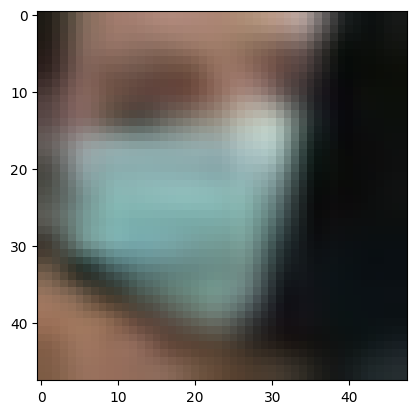

Mask


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loop through the first 5 images in x_test
for i in x_test[12:18]:
    # Resize the image to 48x48 pixels
    i_resized = cv2.resize(i, (48, 48))

    # Expand dimensions to add batch dimension
    i_expanded = np.expand_dims(i_resized, axis=0)

    # Perform prediction
    result = model.predict(i_expanded)

    # Plot the image
    plt.imshow(i_resized)
    plt.show()

    # Perform action based on prediction result
    if result > 0.5:
        print('Mask')
    else:
        print("No Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


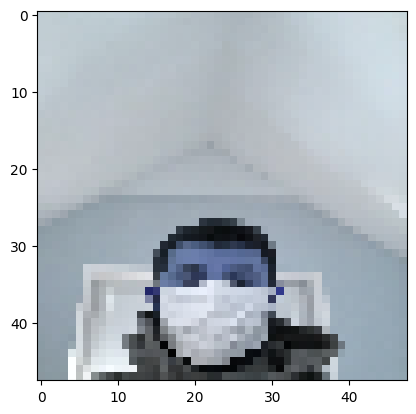

No Mask


In [39]:
import cv2
import numpy as np

# Load the image
img_path = '/kaggle/input/d/andrewmvd/face-mask-detection/images/maksssksksss10.png'
img = cv2.imread(img_path)

# Resize the image to 48x48 pixels
img_resized = cv2.resize(img, (48, 48))

# Convert the image to RGB (assuming it's in BGR format)
img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

# Normalize the pixel values to the range [0, 1]
img_normalized = img_rgb / 255.0

# Add batch dimension to the image
img_with_batch = np.expand_dims(img_normalized, axis=0)

# Perform prediction using the image with batch dimension
result = model.predict(img_with_batch)

# Plot the image
plt.imshow(img_resized)
plt.show()

# Perform action based on prediction result
if result >0.5:
        print('Mask')
else:
        print("No Mask")

In [40]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
# extracting features for training frames

x_train = base_model.predict(x_train)
print(x_train.shape)
# extracting features for validation frames

x_test = base_model.predict(x_test)
print(x_test.shape)

150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
(4790, 1, 1, 512)
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step
(1198, 1, 1, 512)


In [45]:
# reshaping the training as well as validation frames in single dimension

x_train = x_train.reshape(4790, 1*1*512)
x_test = x_test.reshape(1198, 1*1*512)

In [48]:
# shape of images

x_train.shape

(4790, 512)

In [47]:
x_train = x_train/255
x_test = x_test/255

In [49]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(512,)))

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))

# Define Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,222,657 (4.66 MB)

 Trainable params: 1,222,657 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# training the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32, verbose=1)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1100 - val_accuracy: 0.9249 - val_loss: 0.1828
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9535 - loss: 0.1151 - val_accuracy: 0.9432 - val_loss: 0.1382
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9602 - loss: 0.1133 - val_accuracy: 0.9491 - val_loss: 0.1479
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - loss: 0.1075 - val_accuracy: 0.9491 - val_loss: 0.1585
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9607 - loss: 0.0979 - val_accuracy: 0.9457 - val_loss: 0.1334
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9586 - loss: 0.1101 - val_accuracy: 0.9482 - val_loss: 0.1398
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.1115 - val_accuracy: 0.9432 - val_loss: 0.1351
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9567 - loss: 0.1116 - val_accuracy: 0.

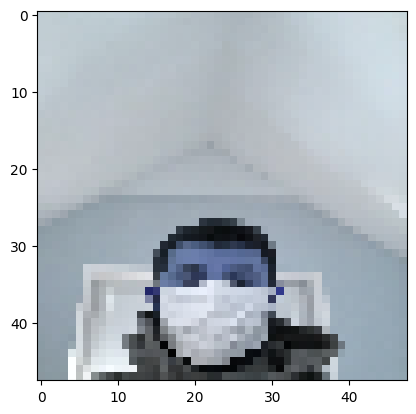

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mask


In [59]:
def prediction(file_path):
    # Read the image using OpenCV
    img = cv2.imread(file_path)
    img = cv2.resize(img, (48, 48))
    # Plot the image
    plt.imshow(img)
    plt.show()
    img = img / 255.0
    
    # Convert the image to array
    img_array = np.expand_dims(img, axis=0)
    
    # Extract features using pre-trained model
    prediction_image = base_model.predict(img_array)
    
    # Convert features into one-dimensional array
    prediction_image = prediction_image.reshape(prediction_image.shape[0],  1* 1 * 512)
    
    # Predict tags for each array
    predictions = model.predict(prediction_image)
    
    predicted_class = "Mask" if predictions > 0.5 else "No Mask"
    
    return predicted_class

file_path = '/kaggle/input/d/andrewmvd/face-mask-detection/images/maksssksksss10.png'

prediction_result = prediction(file_path)
print(prediction_result)